In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))


       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [12]:
# Sort the dataframe by date
df = df.sort_index()

print(df.to_string(index=False))


       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

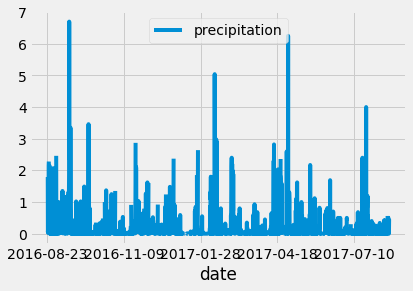

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?

session.query(func.count(Station.station)).all()


[(9)]

In [16]:
# What are the most active stations?

session.query(Measurement.station, func.count(Measurement.station))

# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded,

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.tobs)

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
df.head(10)


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


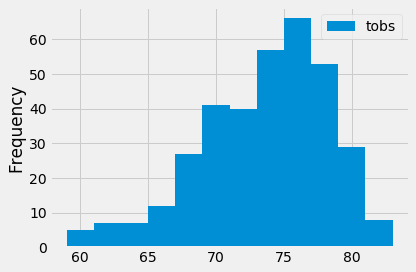

In [19]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df.plot.hist(bins=12)
plt.tight_layout()


In [20]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [22]:
# function returns stat for specified start and end date.
def key_stat_data(start, end):
    results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).\
    filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    # print(f'\n{results}')
    stat_data_df = pd.DataFrame(results, columns=['date', 'prec', 'tobs', 'station'])
    return stat_data_df

In [24]:
results = session.query(Measurement.date)
tmp = pd.DataFrame(results, columns=['date'])

tmp.head()

,date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-06


In [25]:
def get_min_max_years():
    '''
    This function gets start and end year from Measurement
    '''
    results = session.query(func.min(Measurement.date), func.max(Measurement.date)).all()
    return results[0][0].split('-')[0], results[0][1].split('-')[0]

get_min_max_years()

('2010', '2017')

In [26]:
start = '2010-06-01'
end = '2017-06-30'
session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).\
filter(Measurement.date >= start).filter(Measurement.date <= end).all()

[('2010-06-01', 0.0, 78.0, 'USC00519397'),
 ('2010-06-02', 0.01, 76.0, 'USC00519397'),
 ('2010-06-03', 0.0, 78.0, 'USC00519397'),
 ('2010-06-04', 0.0, 76.0, 'USC00519397'),
 ('2010-06-05', 0.0, 77.0, 'USC00519397'),
 ('2010-06-06', 0.0, 78.0, 'USC00519397'),
 ('2010-06-07', 0.0, 77.0, 'USC00519397'),
 ('2010-06-08', 0.0, 78.0, 'USC00519397'),
 ('2010-06-09', 0.0, 78.0, 'USC00519397'),
 ('2010-06-10', 0.0, 79.0, 'USC00519397'),
 ('2010-06-11', 0.0, 78.0, 'USC00519397'),
 ('2010-06-12', 0.0, 78.0, 'USC00519397'),
 ('2010-06-13', 0.0, 78.0, 'USC00519397'),
 ('2010-06-14', 0.0, 77.0, 'USC00519397'),
 ('2010-06-15', 0.0, 78.0, 'USC00519397'),
 ('2010-06-16', 0.0, 78.0, 'USC00519397'),
 ('2010-06-17', 0.0, 77.0, 'USC00519397'),
 ('2010-06-18', 0.0, 77.0, 'USC00519397'),
 ('2010-06-19', 0.0, 82.0, 'USC00519397'),
 ('2010-06-20', 0.0, 78.0, 'USC00519397'),
 ('2010-06-21', 0.0, 78.0, 'USC00519397'),
 ('2010-06-22', 0.0, 78.0, 'USC00519397'),
 ('2010-06-23', 0.0, 78.0, 'USC00519397'),
 ('2010-06

In [28]:
def get_stat_for_month(mon_val):
    '''
    This will get stat for a specified month for all years and return dataframe with information
    '''
    if len(mon_val) != 2:
        print('Error in month format')
        return
    year_range = get_min_max_years()
    start = f'{year_range[0]}-{mon_val}-01'
    end = f'{year_range[1]}-{mon_val}-30'
    return key_stat_data(start, end)

june_df = get_stat_for_month('06')

june_df.head()

,date,prec,tobs,station
0,2010-06-01,0.00,78.0,USC00519397
1,2010-06-02,0.01,76.0,USC00519397
2,2010-06-03,0.00,78.0,USC00519397
3,2010-06-04,0.00,76.0,USC00519397
4,2010-06-05,0.00,77.0,USC00519397


In [34]:
june_df.describe()

,prec,tobs
count,16814.000000,18187.000000
mean,0.164470,73.169132
std,0.478792,4.469392
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


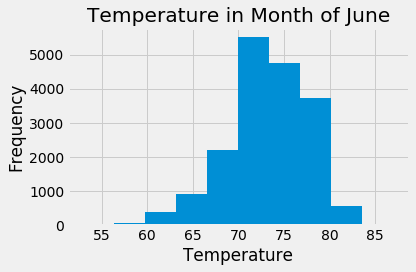

In [29]:
june_df['tobs'].plot.hist()
plt.xlabel('Temperature')
plt.title('Temperature in Month of June')
plt.tight_layout()

In [30]:
dec_df = get_stat_for_month('12')
dec_df.head()

,date,prec,tobs,station
0,2010-12-01,0.04,76.0,USC00519397
1,2010-12-03,0.00,74.0,USC00519397
2,2010-12-04,0.00,74.0,USC00519397
3,2010-12-06,0.00,64.0,USC00519397
4,2010-12-07,0.00,64.0,USC00519397


In [35]:
dec_df.describe()

,prec,tobs
count,15652.000000,17001.000000
mean,0.168818,73.156638
std,0.488971,4.584538
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


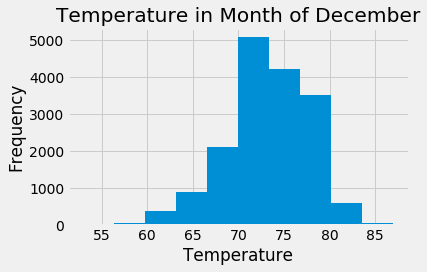

In [31]:
dec_df['tobs'].plot.hist()
plt.xlabel('Temperature')
plt.title('Temperature in Month of December')
plt.tight_layout()

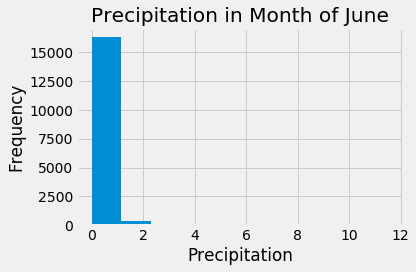

In [32]:
june_df['prec'].plot.hist()
plt.xlabel('Precipitation')
plt.title('Precipitation in Month of June')
plt.tight_layout()

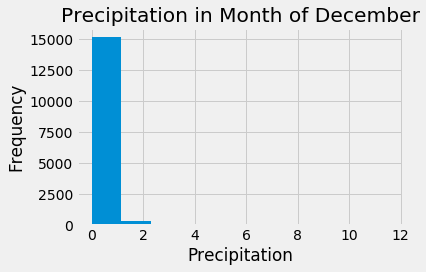

In [33]:
dec_df['prec'].plot.hist()
plt.xlabel('Precipitation')
plt.title('Precipitation in Month of December')
plt.tight_layout()